In [2]:
import os

import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

#exploratory data analysis
import pandas_profiling as pp 

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [36]:
#list all data in folder
path_to_folder = '/Users/shraddha.singh@ibm.com/watson_iot/data'
os.listdir(path_to_folder)

['IOT_CVS_READINGS_locations.csv',
 'IOT_RSDEVICETYPE.csv',
 'IOT_NUMBERTAG.csv',
 'IOT_CAKEBREADFLOAT.csv',
 'IOT_JOSEPHPHELPS_DEVICE_TYPE.csv',
 'IOT_RODNEYSTRONG_DEVICE_TYPE.csv']

In [41]:
os.getcwd()

'/Users/shraddha.singh@ibm.com/watson_iot/ss-iotfunctions/ss-iotfunctions/notebooks'

## DATA 1

In [ ]:
#IOT_CAKEBREADFLOAT
filepath = '/Users/shraddha.singh@ibm.com/watson_iot/data/IOT_CAKEBREADFLOAT.csv'
timestampcolumn = 'T_STAMP'
df = pd.read_csv(filepath, index_col=False)
df['timestamp'] = pd.to_datetime(df[timestampcolumn], unit='ms')

In [ ]:
df['TAGID'].unique()

In [ ]:
df_36 = df[df['TAGID'] == 36]

In [ ]:
df_36.head()

In [ ]:
df_36.describe()

In [ ]:
plt.figure(figsize=(30,15))
sns.lineplot(x=timestampcolumn, y="INTVALUE",
             data=df)

In [ ]:
df_36['deviceid'] = 'CakebreadId_0036'

In [ ]:
df_36 = df_36.rename(str.lower, axis='columns')[['floatvalue', 'timestamp', 'deviceid']]

In [ ]:
#save the explored data
df_36.to_csv('../data/cakebread36_6months.csv', index=False)

In [ ]:
#duplicated rows
df_36.duplicated().unique()

In [ ]:
#duplicated timestamp
df_36.duplicated(subset='timestamp').unique()

## DATA 2

In [230]:
#IOT_NUMBERTAG
filepath = '/Users/shraddha.singh@ibm.com/watson_iot/data/IOT_NUMBERTAG.csv'
timestampcolumn = 'EVT_TIMESTAMP'
df = pd.read_csv(filepath, index_col=False)
df['timestamp'] = pd.to_datetime(df[timestampcolumn], format='%Y-%m-%d-%H.%M.%S.%f')

df.head(2)

,LOGICALINTERFACE_ID,EVT_TIMESTAMP,FORMAT,EVENTTYPE,VALUE,STATUS,DEVICEID,DEVICETYPE,RCV_TIMESTAMP_UTC,UPDATED_UTC,timestamp
0,5fa88c5e0b1212000abcf542,2020-09-12-06.06.57.370000,json,tagdata,6030.0,,e6286081-c9af-560b-b051-6a5825911161,NumberTag,2020-11-10-13.02.37.748000,2020-11-09-18.25.05.000000,2020-09-12 06:06:57.370
1,5fa88c5e0b1212000abcf542,2020-09-12-06.06.57.370000,json,tagdata,0.0,,243427a3-5b33-5924-bac4-3ab93a01c14f,NumberTag,2020-11-10-13.02.34.553000,2020-11-09-18.25.08.000000,2020-09-12 06:06:57.370


In [231]:
df['DEVICEID'].unique()

array(['e6286081-c9af-560b-b051-6a5825911161',
       '243427a3-5b33-5924-bac4-3ab93a01c14f',
       'beb3895f-6a88-5b8f-a6be-f880c1fd6f78',
       'fe7be334-1534-56db-87a0-6bac4e7714c6',
       '7fab1a73-fc93-59eb-b7db-2a508073cc9c',
       'be9bdd61-e16e-5848-bf2f-818d04d4a26b',
       '49c573ca-3eb1-5e40-97c0-838053004567'], dtype=object)

In [232]:
df_entity_1 = df[df['DEVICEID'] == 'e6286081-c9af-560b-b051-6a5825911161']
df_entity_2 = df[df['DEVICEID'] == '243427a3-5b33-5924-bac4-3ab93a01c14f']
df_entity_3 = df[df['DEVICEID'] == 'beb3895f-6a88-5b8f-a6be-f880c1fd6f78']
df_entity_4 = df[df['DEVICEID'] == 'fe7be334-1534-56db-87a0-6bac4e7714c6']
df_entity_5 = df[df['DEVICEID'] == '7fab1a73-fc93-59eb-b7db-2a508073cc9c']
df_entity_6 = df[df['DEVICEID'] == 'be9bdd61-e16e-5848-bf2f-818d04d4a26b']
df_entity_7 = df[df['DEVICEID'] == '49c573ca-3eb1-5e40-97c0-838053004567']

In [ ]:
plot_size = (30, 15)
fig, ax = plt.subplots(figsize=plot_size)
sns.lineplot(x='timestamp', y='VALUE', data=df, hue='DEVICEID')

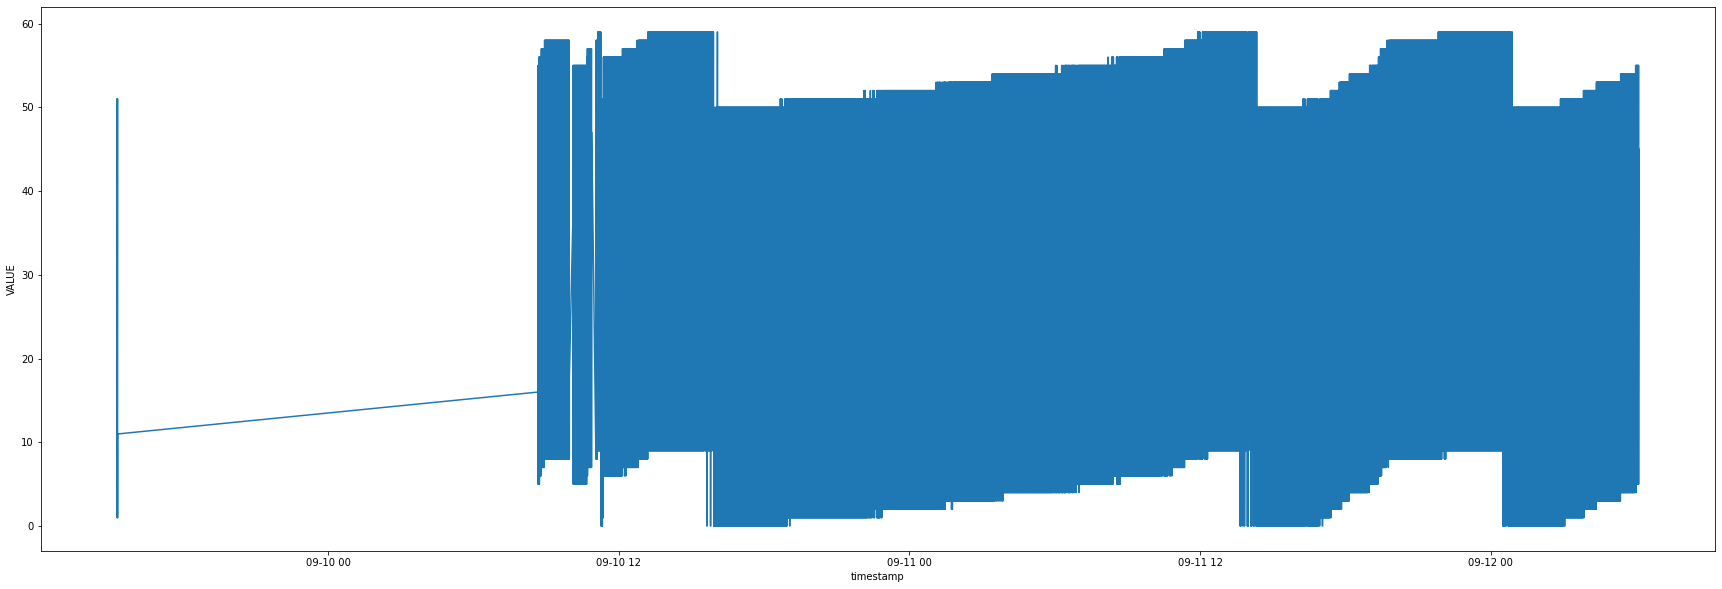

In [233]:
plot_size = (30, 10)
fig, ax = plt.subplots(figsize=plot_size)
sns.lineplot(x='timestamp', y='VALUE', data=df_entity_7)

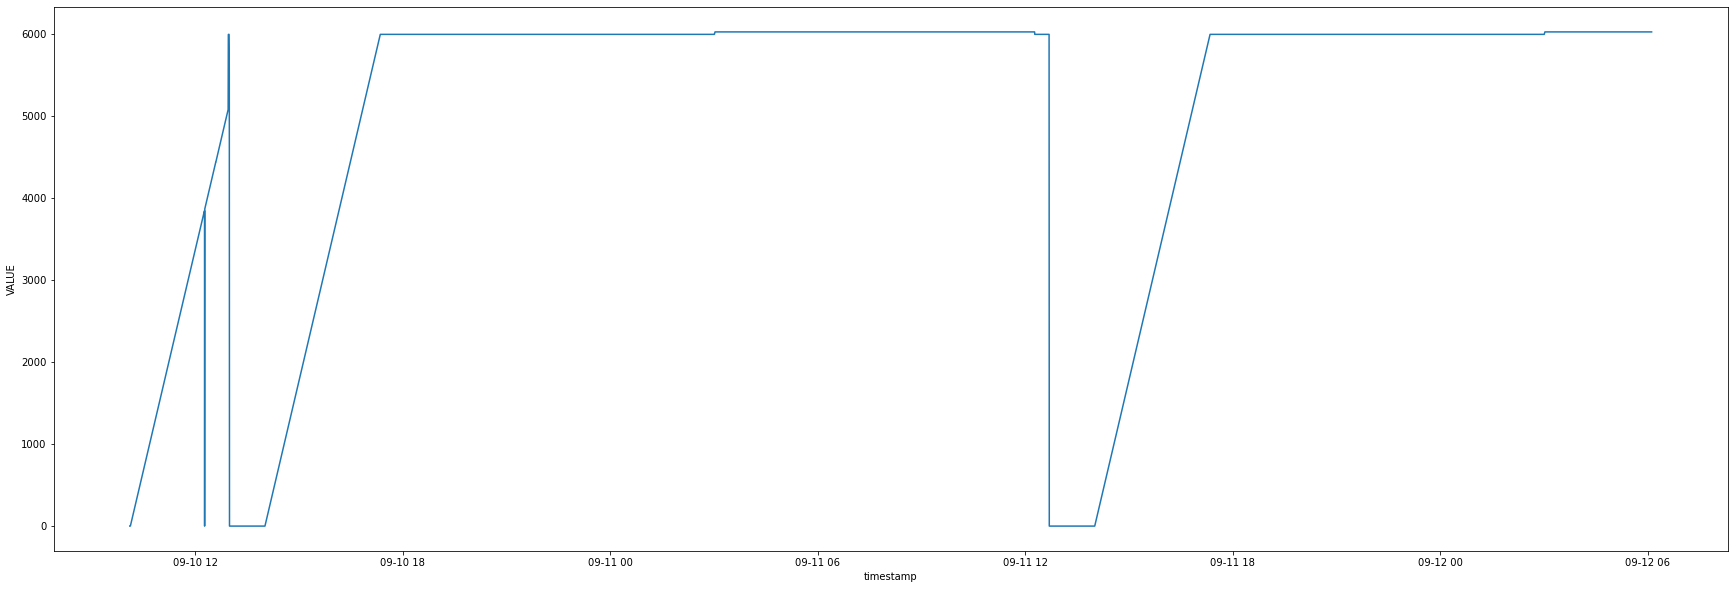

In [234]:
plot_size = (30, 10)
fig, ax = plt.subplots(figsize=plot_size)
sns.lineplot(x='timestamp', y='VALUE', data=df_entity_1)

In [244]:
df_entity_1.describe()

,VALUE,timestamp
count,1.885063e+06,1.885063e+06
mean,6.021572e+03,1.599890e+18
std,1.972916e+02,8.309157e+12
min,0.000000e+00,1.599732e+18
25%,6.030000e+03,1.599891e+18
50%,6.030000e+03,1.599891e+18
75%,6.030000e+03,1.599891e+18
max,6.030000e+03,1.599891e+18


In [242]:
df_entity_1.timestamp = df_entity_1.timestamp.astype(np.int64)

In [245]:
train_w_datapoints = 250000

In [246]:
#input for training (Has to be atleast 500 datapoints)
df_entity_1.dropna()[:train_w_datapoints].to_csv('~/watson_iot/deepad/DeepAD/anomaly_detection/anomaly-flask/models/Numbertag/Numbertag_anomaly.csv', 
                   header=None, 
                   index=None,
                   columns=['timestamp', 'VALUE'])

In [ ]:
#input for testing prediction
df_entity_1.dropna()[train_w_datapoints:].to_csv('/Users/shraddha.singh@ibm.com/watson_iot/deepad/DeepAD/anomaly_detection/anomaly-flask/prediction_numbertag/Numbertag_anomaly.csv', 
                   header=None, 
                   index=None,
                   columns=['timestamp', 'VALUE'])

## DATA 3

In [229]:
filepath = '/Users/shraddha.singh@ibm.com/watson_iot/data/IOT_RSDEVICETYPE.csv'
timestampcolumn = 'RCV_TIMESTAMP_UTC'
df = pd.read_csv(filepath, index_col=False, parse_dates=[timestampcolumn])
df.describe()

,TAGID,INTVALUE,STRINGVALUE,DATEVALUE,FLOATVALUE
count,18303.0,18303.000000,0.0,0.0,18303.0
mean,2.0,65.205103,NaN,NaN,0.0
std,0.0,22.442216,NaN,NaN,0.0
min,2.0,-33.000000,NaN,NaN,0.0
25%,2.0,69.000000,NaN,NaN,0.0
50%,2.0,72.000000,NaN,NaN,0.0
75%,2.0,78.000000,NaN,NaN,0.0
max,2.0,116.000000,NaN,NaN,0.0


In [28]:
df['DEVICEID'].unique()

array(['RSDevId_0002'], dtype=object)

In [29]:
#find data with duplicated timestamp
duplicate_timestamp = df[df['RCV_TIMESTAMP_UTC'].duplicated() == True]['RCV_TIMESTAMP_UTC'].to_list()
df[df['RCV_TIMESTAMP_UTC'].isin(duplicate_timestamp)]

,EVT_NAME,TAGID,INTVALUE,STRINGVALUE,DATEVALUE,FLOATVALUE,DEVICETYPE,DEVICEID,LOGICALINTERFACE_ID,EVENTTYPE,FORMAT,RCV_TIMESTAMP_UTC,UPDATED_UTC
306,efficiency,2.0,63.0,NaN,NaN,0.0,RSDeviceType,RSDevId_0002,5fb40ba8e7f6420009a5c156,RSDeviceTypeEvent,JSON,2020-12-18-07.46.14.000000,2020-12-18-07.46.14.000000
307,efficiency,2.0,64.0,NaN,NaN,0.0,RSDeviceType,RSDevId_0002,5fb40ba8e7f6420009a5c156,RSDeviceTypeEvent,JSON,2020-12-18-07.46.14.000000,2020-12-18-07.46.14.000000
564,efficiency,2.0,58.0,NaN,NaN,0.0,RSDeviceType,RSDevId_0002,5fb40ba8e7f6420009a5c156,RSDeviceTypeEvent,JSON,2020-12-10-07.55.56.000000,2020-12-10-07.55.56.000000
565,efficiency,2.0,0.0,NaN,NaN,0.0,RSDeviceType,RSDevId_0002,5fb40ba8e7f6420009a5c156,RSDeviceTypeEvent,JSON,2020-12-10-07.55.56.000000,2020-12-10-07.55.56.000000
1617,efficiency,2.0,29.0,NaN,NaN,0.0,RSDeviceType,RSDevId_0002,5fb40ba8e7f6420009a5c156,RSDeviceTypeEvent,JSON,2020-12-09-10.13.50.000000,2020-12-09-10.13.50.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17455,efficiency,2.0,77.0,NaN,NaN,0.0,RSDeviceType,RSDevId_0002,5fb40ba8e7f6420009a5c156,RSDeviceTypeEvent,JSON,2020-11-16-12.43.08.000000,2020-11-16-12.43.08.000000
17857,efficiency,2.0,69.0,NaN,NaN,0.0,RSDeviceType,RSDevId_0002,5fb40ba8e7f6420009a5c156,RSDeviceTypeEvent,JSON,2020-11-16-12.13.56.000000,2020-11-16-12.13.56.000000
17858,efficiency,2.0,77.0,NaN,NaN,0.0,RSDeviceType,RSDevId_0002,5fb40ba8e7f6420009a5c156,RSDeviceTypeEvent,JSON,2020-11-16-12.13.56.000000,2020-11-16-12.13.56.000000
18056,efficiency,2.0,77.0,NaN,NaN,0.0,RSDeviceType,RSDevId_0002,5fb40ba8e7f6420009a5c156,RSDeviceTypeEvent,JSON,2020-11-16-12.02.58.000000,2020-11-16-12.02.58.000000


In [30]:
df = df[:2000]
df = df[['INTVALUE', 'RCV_TIMESTAMP_UTC', 'DEVICEID']]

In [31]:
df.describe()

,INTVALUE
count,2000.000000
mean,49.457000
std,26.667672
min,-33.000000
25%,34.000000
50%,57.000000
75%,70.000000
max,78.000000


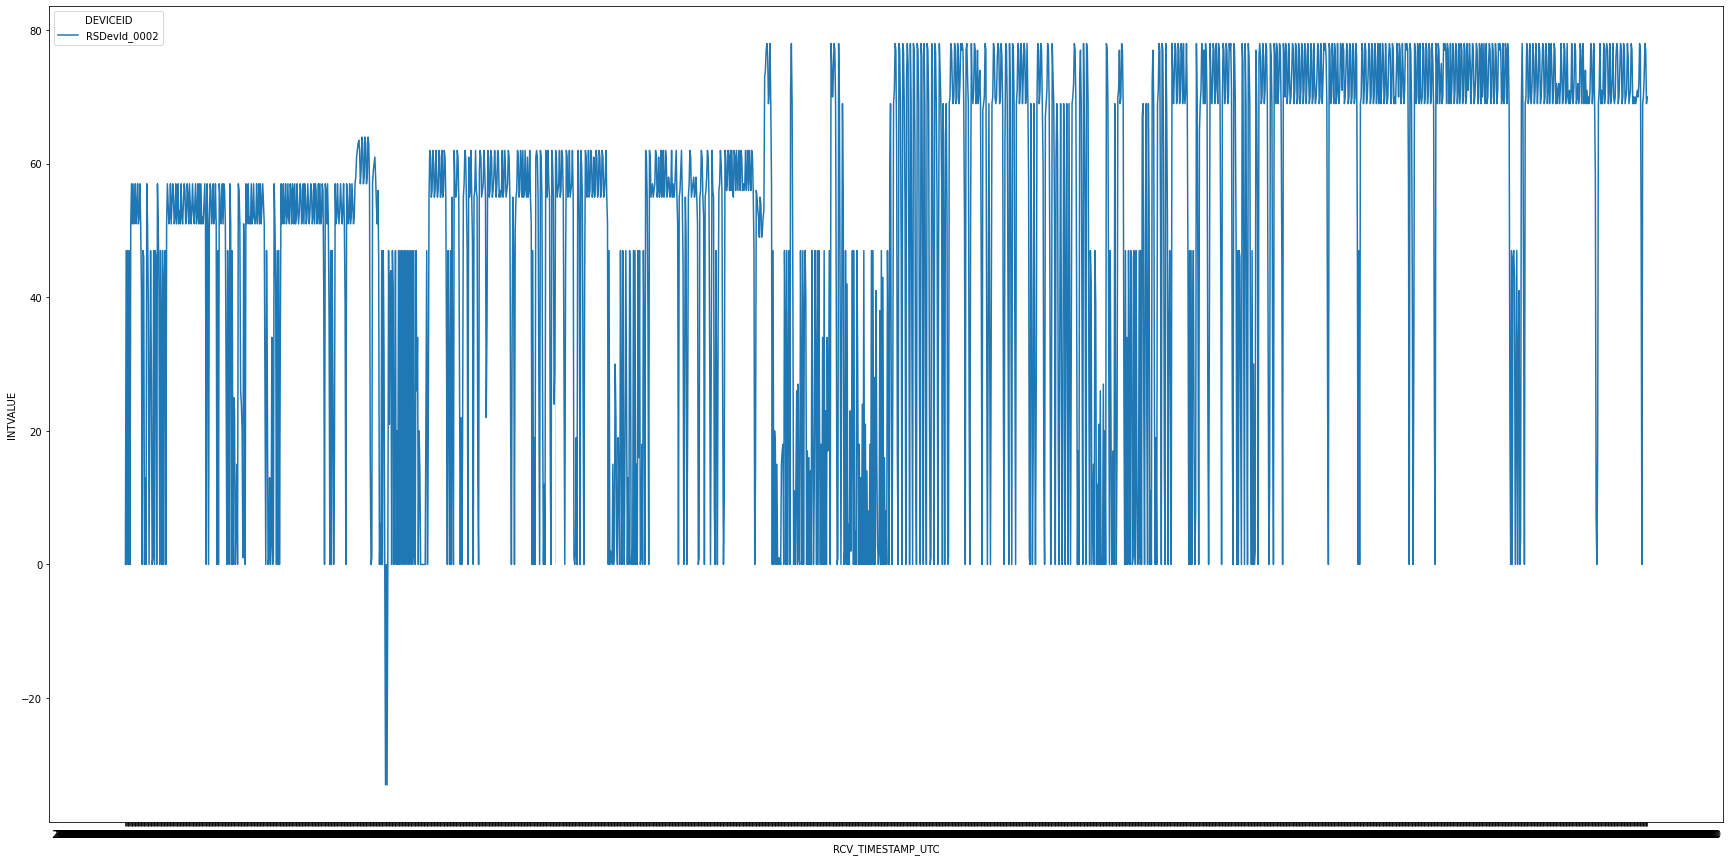

In [32]:
plot_size = (30, 15)
fig, ax = plt.subplots(figsize=plot_size)
sns.lineplot(x='RCV_TIMESTAMP_UTC', y='INTVALUE', data=df, hue='DEVICEID')

In [ ]:
#save the explored data
df.to_csv('../data/scada.csv', index=False)

## DATA 4 (CVS)

In [228]:
filepath = '/Users/shraddha.singh@ibm.com/watson_iot/data/IOT_CVS_READINGS_locations.csv'
timestampcolumn = 'READING_TIMESTAMP'
df = pd.read_csv(filepath, index_col=False, parse_dates=[timestampcolumn])
df.describe()

,LOCATION_ID,COST,VALUE,Total_SqFt,MonthHRS,Year
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,4219.099715,4071.470456,30966.996134,11280.660969,487.062678,2018.871795
std,3825.803025,2246.109663,12329.987094,3472.970019,36.896249,0.780532
min,80.000000,1310.330000,8952.914000,4872.000000,392.000000,2018.000000
25%,827.000000,2472.380000,22320.978500,9000.000000,465.000000,2018.000000
50%,2360.000000,3067.360000,29618.667000,11805.000000,493.000000,2019.000000
75%,8900.000000,5604.455000,38440.709500,12900.000000,527.000000,2019.000000
max,10644.000000,11493.420000,70759.291000,18832.000000,527.000000,2020.000000


In [ ]:
profile = pp.ProfileReport(df) 
profile.to_file('output/cvs_readings_profile.html')

In [42]:
profile.to_file('../output/cvs_readings_profile.html')

## DATA 5 (Armstrong)

for a motor power = (torque) x (rpm) / 9.57 <br>
The power input (current times voltage) is a good indicator of the mechanical power output

**source** <br>
Armstrong-pump_power_anomaly <br>
**prediction server** <br>
python3 server.py False Armstrong-pump_power_anomaly /Users/shraddha.singh@ibm.com/watson_iot/deepad/DeepAD/anomaly_detection/anomaly-flask/prediction 500 <br>

In [196]:
filepath = '/Users/shraddha.singh@ibm.com/watson_iot/data/1096-first-50-hours.csv'
df = pd.read_csv(filepath, index_col=False)

In [202]:
df.head()

,SPEED,TEMPERATURE,HEAD,FLOW,KW_HOUR,VOLTAGE,POWER,CURRENT,TIMESTAMP
0,1053.0,52.8,48.298,16.294,3629.927,251.0,1.556,7.15,1.162341e+09
1,1053.0,53.0,48.289,14.196,3630.059,251.0,1.544,7.13,1.162341e+09
2,1054.0,52.8,48.394,17.365,3630.190,251.0,1.570,7.17,1.162342e+09
3,1057.0,53.1,48.711,30.140,3630.324,252.0,1.670,7.35,1.162342e+09
4,1055.0,53.5,48.506,22.536,3630.462,251.0,1.614,7.27,1.162342e+09


In [198]:
df.DEVICE_ID.unique()

array(['04714B601096', nan], dtype=object)

In [199]:
df = df.drop(columns=['LOGICALINTERFACE_ID','EVENTTYPE', 'FORMAT', 'DEVICEID', 'ALARM', 'UPDATED_UTC','DEVICETYPE', 'WARN', 'PUMP_MODE', 'RCV_TIMESTAMP_UTC', 'DEVICE_ID'])

In [200]:
df['TIMESTAMP'] = df['TIMESTAMP'] - 2e9

In [226]:
df.dtypes #DeepAD reads input as str and convetrs to float

SPEED          float64
TEMPERATURE    float64
HEAD           float64
FLOW           float64
KW_HOUR        float64
VOLTAGE        float64
POWER          float64
CURRENT        float64
TIMESTAMP      float64
dtype: object

In [131]:
#input for training (Has to be atleast 500 datapoints)
df.dropna().to_csv('~/watson_iot/deepad/DeepAD/anomaly_detection/anomaly-flask/models/Armstrong-pump_power_anomaly/Armstrong-pump_power_anomaly.csv', 
                   header=None, 
                   index=None,
                   columns=['TIMESTAMP', 'POWER'])

In [203]:
#input for testing prediction
df.dropna().to_csv('/Users/shraddha.singh@ibm.com/watson_iot/deepad/DeepAD/anomaly_detection/anomaly-flask/prediction/armstrong_1_input.csv', 
                   header=None, 
                   index=None,
                   columns=['TIMESTAMP', 'POWER'])

In [204]:
df.describe()

,SPEED,TEMPERATURE,HEAD,FLOW,KW_HOUR,VOLTAGE,POWER,CURRENT,TIMESTAMP
count,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,6.080000e+02
mean,1060.376645,52.033388,49.010285,35.241656,3674.345123,253.166118,1.723444,7.382780,1.162434e+09
std,8.094046,0.572276,0.770269,19.706620,26.823262,2.837796,0.171659,0.239877,5.577625e+04
min,1052.000000,49.700000,48.122000,0.509000,3629.927000,250.000000,1.454000,7.000000,1.162341e+09
25%,1054.000000,51.800000,48.398750,18.618250,3652.344500,251.000000,1.581500,7.180000,1.162387e+09
50%,1058.000000,52.000000,48.812000,34.268500,3672.200500,252.000000,1.705000,7.350000,1.162432e+09
75%,1065.000000,52.400000,49.471000,49.672750,3696.509750,255.000000,1.836500,7.540000,1.162478e+09
max,1089.000000,53.700000,51.609000,85.564000,3731.344000,263.000000,2.218000,8.090000,1.162554e+09


In [210]:
# read in server prediction output
filepath = '/Users/shraddha.singh@ibm.com/watson_iot/deepad/DeepAD/anomaly_detection/anomaly-flask/prediction/armstrong_1_input.csv_predictions'
timestampcolumn = 'timestamp'
df_anomaly = pd.read_csv(filepath, index_col=False, parse_dates=[timestampcolumn])
df_anomaly.describe()

,value,error,is_anomaly,score
count,608.000000,608.000000,608.000000,608.000000
mean,1.723444,0.123909,0.004934,-3.311509
std,0.171659,0.239171,0.070128,0.789180
min,1.454000,-0.001050,0.000000,-6.496307
25%,1.581500,0.001418,0.000000,-3.750389
50%,1.705000,0.015904,0.000000,-3.344318
75%,1.836500,0.112872,0.000000,-2.936969
max,2.218000,1.000000,1.000000,3.477972


In [211]:
#redo columns for pretty plots
df_anomaly[timestampcolumn] = pd.to_datetime(df_anomaly[timestampcolumn], unit='s')
df_anomaly['plot_anomaly'] = df_anomaly.is_anomaly.replace([0, 1],  [np.nan, df_anomaly.value.max()])

In [212]:
df_anomaly.head()

,timestamp,value,error,is_anomaly,score,plot_anomaly
0,2006-11-01 00:31:06,1.556,0.980345,0,-2.532488,NaN
1,2006-11-01 00:36:06,1.544,0.096308,0,-3.308847,NaN
2,2006-11-01 00:41:07,1.570,0.000082,0,-4.463714,NaN
3,2006-11-01 00:46:07,1.670,0.044391,0,-4.160283,NaN
4,2006-11-01 00:51:07,1.614,-0.000003,0,-4.062466,NaN


In [213]:
df_anomaly.describe()

,value,error,is_anomaly,score,plot_anomaly
count,608.000000,608.000000,608.000000,608.000000,3.000
mean,1.723444,0.123909,0.004934,-3.311509,2.218
std,0.171659,0.239171,0.070128,0.789180,0.000
min,1.454000,-0.001050,0.000000,-6.496307,2.218
25%,1.581500,0.001418,0.000000,-3.750389,2.218
50%,1.705000,0.015904,0.000000,-3.344318,2.218
75%,1.836500,0.112872,0.000000,-2.936969,2.218
max,2.218000,1.000000,1.000000,3.477972,2.218


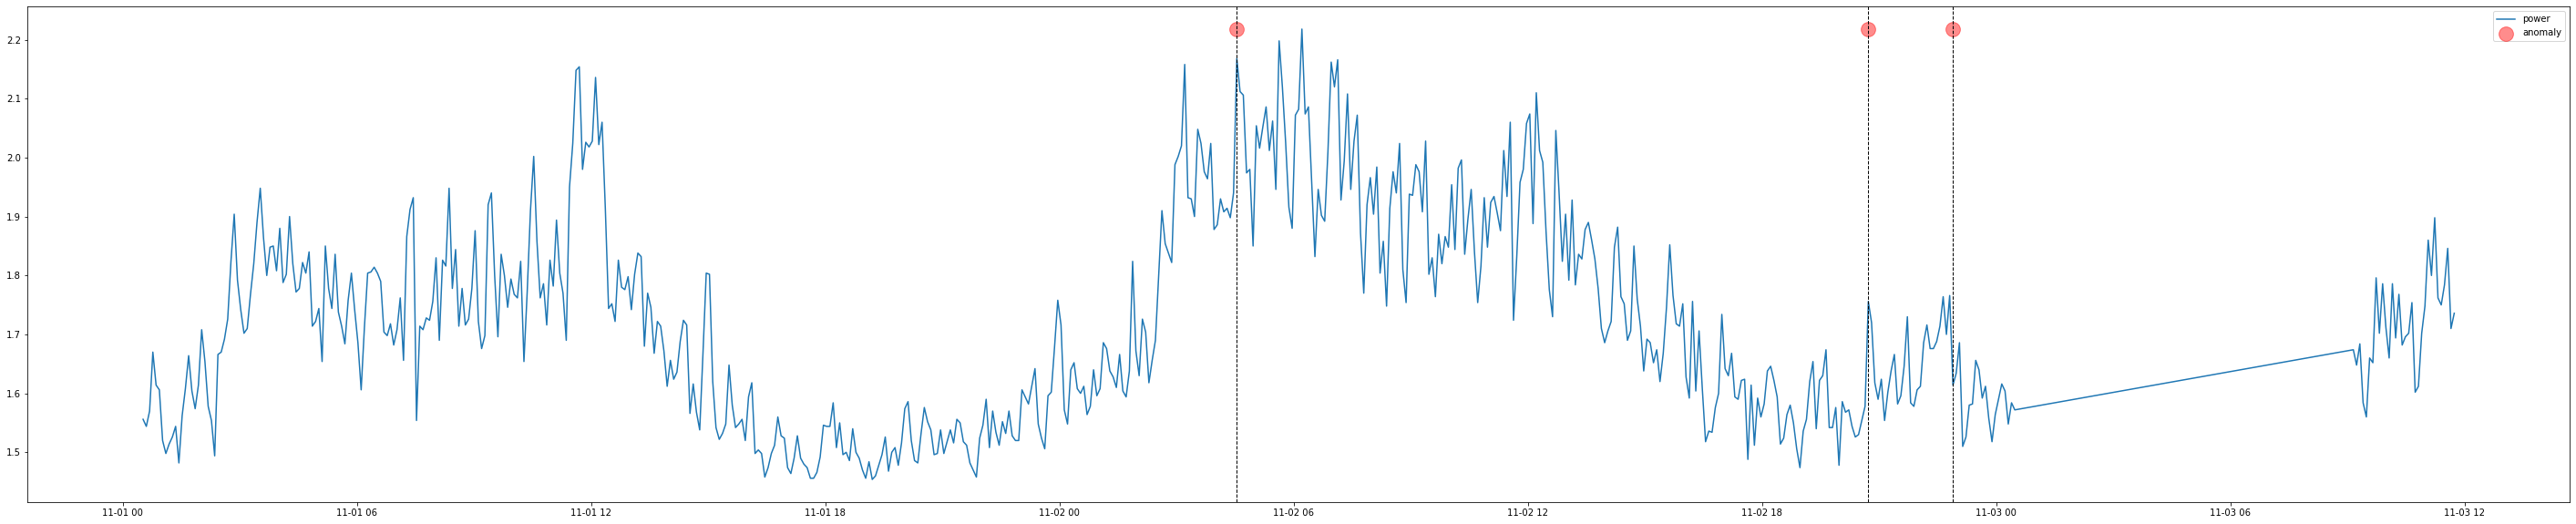

In [225]:
#plot anomalies in power
#plot asthetics
plot_size = (50, 10)
fig, ax = plt.subplots(figsize=plot_size)

#plot anomalies and Power value curve
plt.scatter(df_anomaly.timestamp, df_anomaly['plot_anomaly'], label="anomaly", c='red', s=250, alpha=0.45)
plt.plot(df_anomaly.timestamp, df_anomaly['value'], label="power")

#vertical lines
xpositions_anomaly = df_anomaly[df_anomaly.is_anomaly == 1]['timestamp'].to_list()
for x in xpositions_anomaly:
    plt.axvline(x=x, color='k', linestyle='--', linewidth=1)
    
#plot asthetics
plt.legend()
plt.show(block=False)

## DATA 6 (Armstark Anomamly from 07-14, 27-31)

In [ ]:
filepath = '/Users/shraddha.singh@ibm.com/watson_iot/data/anomaly/armstark_strong_vibrations_anomaly.csv'
df = pd.read_csv(filepath, header=None, parse_dates=[0])
df.head()

In [36]:
df.describe()

,1
count,8613.000000
mean,3.714736
std,0.088517
min,3.299344
25%,3.664859
50%,3.701923
75%,3.758416
max,4.221860


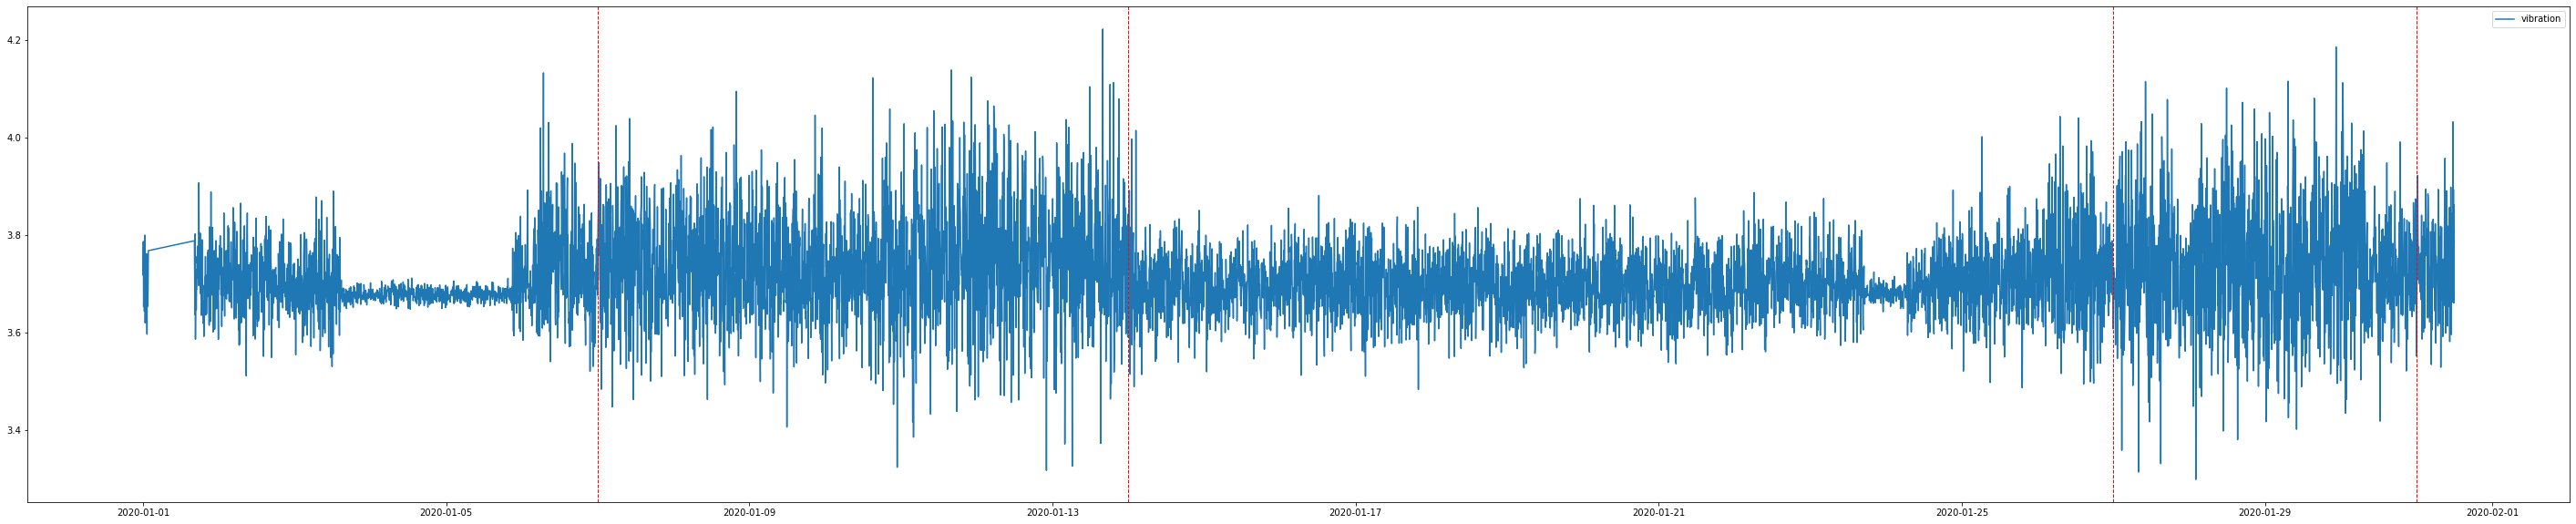

In [30]:
#plot anomalies in power
#plot asthetics
plot_size = (50, 10)
fig, ax = plt.subplots(figsize=plot_size)

#plot anomalies and Power value curve
plt.plot(df[0], df[1], label="vibration")

#vertical lines
xpositions_anomaly = [dt.datetime(2020,1,7,0,0,0), dt.datetime(2020,1,14,0,0,0), dt.datetime(2020,1,27,0,0,0), dt.datetime(2020,1,31,0,0,0)]
for x in xpositions_anomaly:
    plt.axvline(x=x, color='r', linestyle='--', linewidth=1)
    
#plot asthetics
plt.legend()
plt.show(block=False)

## DATA 7 Temperature (spike anomaly)

In [38]:
filepath = '/Users/shraddha.singh@ibm.com/watson_iot/data/anomaly/temperature_spike_anomaly.csv'
df = pd.read_csv(filepath, header=None, parse_dates=[0])
df.head()

,0,1
0,2017-10-09 20:32:00,23.0
1,2017-10-09 20:33:00,23.0
2,2017-10-09 20:34:00,23.0
3,2017-10-09 20:35:00,23.0
4,2017-10-09 20:36:00,23.0


In [39]:
df.describe()

,1
count,4000.000000
mean,24.264336
std,1.484244
min,20.000000
25%,23.062500
50%,24.000000
75%,25.437500
max,30.750000


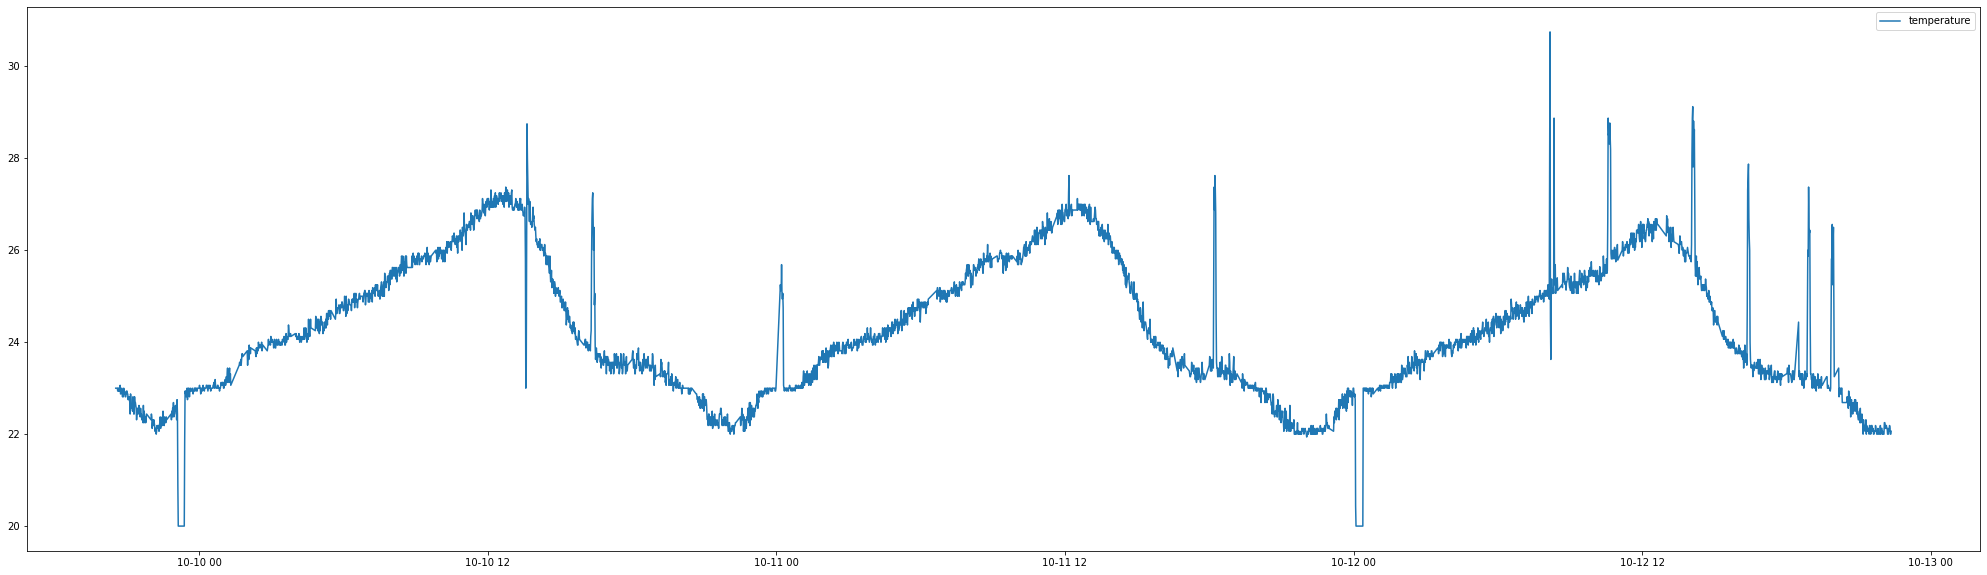

In [41]:
#plot anomalies in power
#plot asthetics
plot_size = (35, 10)
fig, ax = plt.subplots(figsize=plot_size)

#plot anomalies and Power value curve
plt.plot(df[0], df[1], label="temperature")
    
#plot asthetics
plt.legend()
plt.show(block=False)